# Line and edge detection

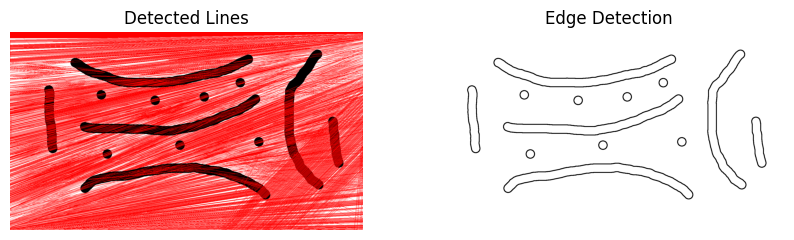

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def line_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve line detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to further reduce noise and enhance edges
    edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect lines using Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=5)

    # Draw the detected lines on the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    # Convert BGR image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the original image with detected lines
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Detected Lines')
    plt.axis('off')

    # Plot the edge-detected image
    plt.subplot(122)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.show()

image_path = 'Images/lines.png'
line_detection(image_path)


Ebben a programban a cv2.adaptiveThreshold() 
függvényt használjuk az élkiemeléshez, és a vonalak detektálásához az éldetektált képen használjuk 
a Probabilisztikus Hough Transzformációt. Az adaptív küszöbölés segít a zaj csökkentésében és az élek kiemelésében,
ami elősegítheti a vonalak pontosabb detektálását.
A kód a Hough Line Transzformációval és nem kifejezetten az élkiemeléssel detektálja a vonalakat a képen. A Canny éldetektálás a Hough Line Transzformáció előkészítésére szolgál, hogy a vonalakat az éleken alapulva könnyebben megtalálja.


Zajcsökkentés és élkiemelés: A kép általában zajos lehet, és az élek kiemelése segíthet a vonalak detektálásában. A cv2.GaussianBlur() függvénnyel alkalmazunk Gauss-simítást a zaj csökkentése érdekében, majd az cv2.adaptiveThreshold() függvénnyel adaptív küszöbölést alkalmazunk az élek kiemeléséhez.

Hough Line Transzformáció: A vonalak detektálásához a Hough Line Transzformációt használjuk, amely egy matematikai transzformációs módszer a vonalak azonosítására a képen. A cv2.HoughLinesP() függvénnyel végrehajtjuk ezt a transzformációt a Canny élkiemelővel megtalált éleken.

Vonalak megjelenítése: Ha a Hough Line Transzformáció talál vonalakat a képen, akkor azokat a cv2.line() függvénnyel megjelenítjük a képen. Ezen a ponton az image változó tartalmazza az eredeti képet, és a vonalakat zöld színű vonalakként rajzoljuk rá a képre.